In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

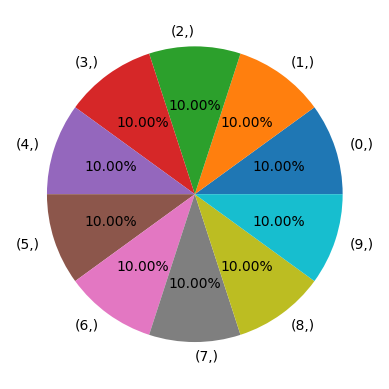

In [3]:
y = pd.DataFrame(y_train)
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct = '%2.2f%%');

In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

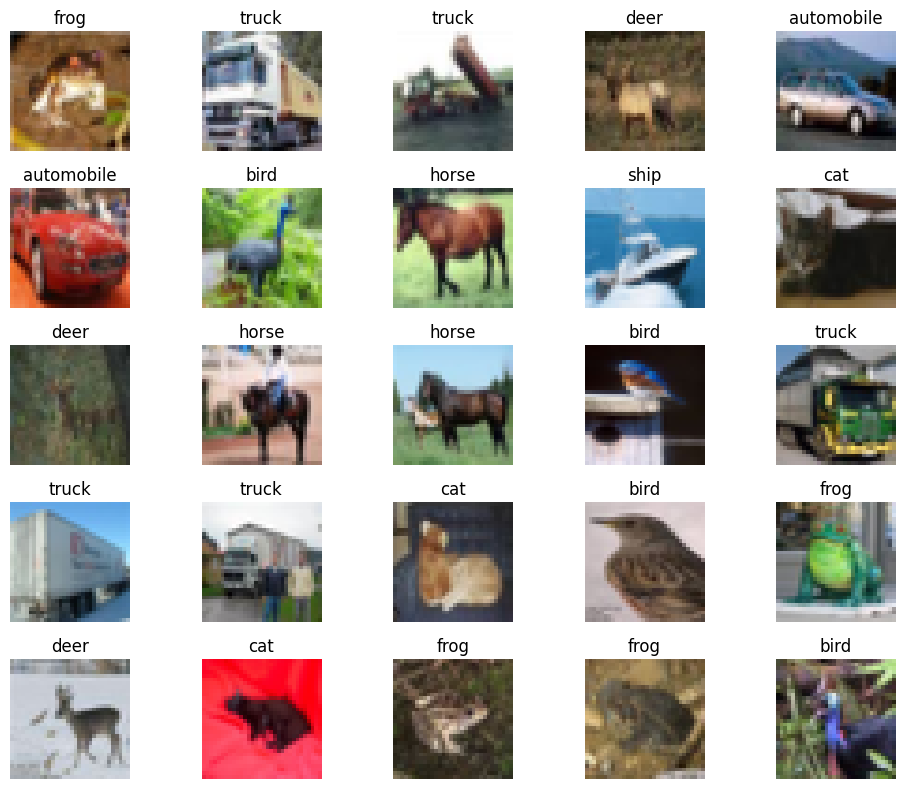

In [5]:
fig, ax = plt.subplots(5, 5,figsize = (10,8))
for i, axes in enumerate(ax.flat):
    axes.imshow(X_train[i])
    axes.axis('off')
    axes.set_title(labels[y_train[i][0]])
    
plt.tight_layout();

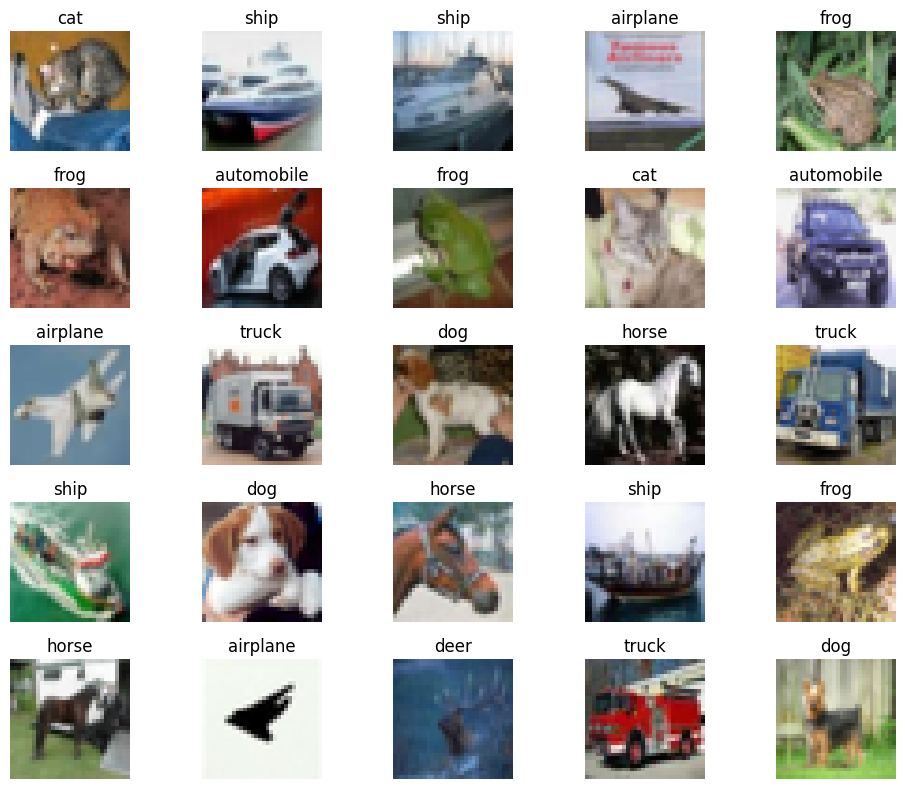

In [6]:
fig, ax = plt.subplots(5, 5,figsize = (10,8))
for i, axes in enumerate(ax.flat):
    axes.imshow(X_test[i])
    axes.axis('off')
    axes.set_title(labels[y_test[i][0]])
    
plt.tight_layout();

In [7]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])
model.summary()
    

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,418 (732.10 KB)

 Trainable params: 187,418 (732.10 KB)

 Non-trainable params: 0 (0.00 B)

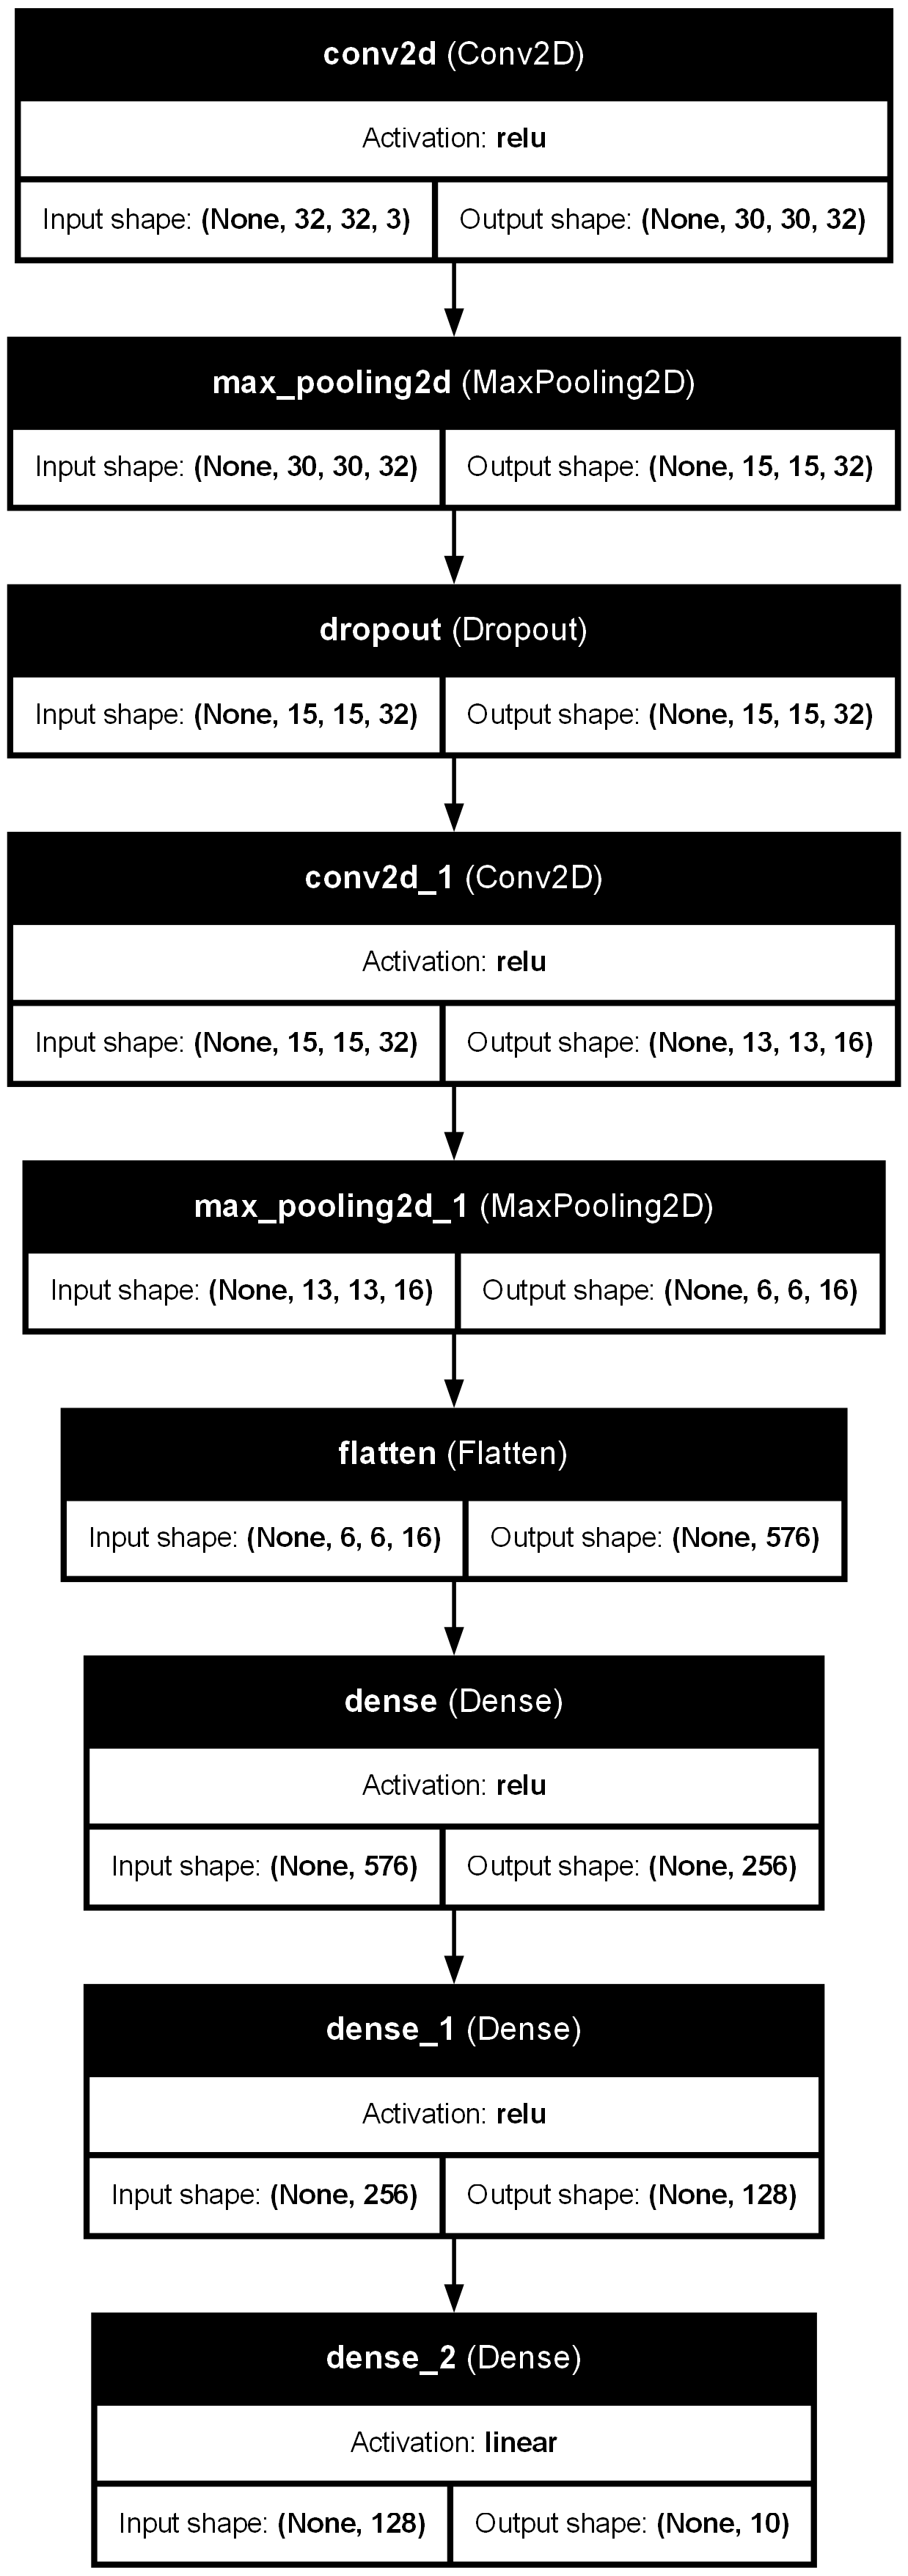

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_activations = True, show_shapes = True, show_layer_names= True)

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
# optimizer = tf.keras.optimizers.Adam(learning_rate = ALPHA)
model.compile(optimizer = 'adam', loss= loss_fn, metrics = ['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = [X_test, y_test], batch_size = 10)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.1936 - loss: 2.6682 - val_accuracy: 0.3963 - val_loss: 1.6472
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.4373 - loss: 1.5622 - val_accuracy: 0.4917 - val_loss: 1.4289
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.5005 - loss: 1.4078 - val_accuracy: 0.5068 - val_loss: 1.4021
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.5472 - loss: 1.2970 - val_accuracy: 0.5407 - val_loss: 1.3134
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.5739 - loss: 1.2253 - val_accuracy: 0.5511 - val_loss: 1.3299
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.6004 - loss: 1.1548 - val_accuracy: 0.5843 - val_loss: 1.2164
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.6218 - loss: 1.0958 - val_accuracy: 0.5866 - val_loss: 1.2329
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.6415 - loss: 1

In [11]:
hist_df = pd.DataFrame(history.history)

In [12]:
import cv2

In [13]:
im = cv2.imread(r"C:\Users\DAI.STUDENTSDC\Downloads\gelding-bay-coat.webp")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
im

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 61,  39,  42],
        [255, 255, 253],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [169, 164, 161],
        [255, 255, 255],
        [253, 254, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 28,  18,  15],
        [254, 254, 252],
        [254, 254, 254]],

       ...,

       [[ 31,  26,  26],
        [ 21,  11,  12],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[ 44,  43,  40],
        [ 36,  30,  28],
        [255, 253, 252],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 251],
        [ 64,  57,  60],
        [210, 207, 206],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [1]:
im = im.reshape(1, 32, 32, 3)
probs = model.predict(im)
index = probs.argmax()
labels[index]

NameError: name 'im' is not defined